# Clustering-based image compression

Clustering can be used to reduce the number of colors in an image in a meaningful way. In this post, I use $k$-Means clustering on the colors of an image to find a good subset of $k$ colors, such that the image is approximated well.

The original image I use was shot by [a4gpa](https://www.flickr.com/photos/a4gpa/1563029463/) and is licensed as [CC-BY-SA 2.0](https://creativecommons.org/licenses/by-sa/2.0).

Let's start by reading in the image and scaling it down a bit and displaying it.

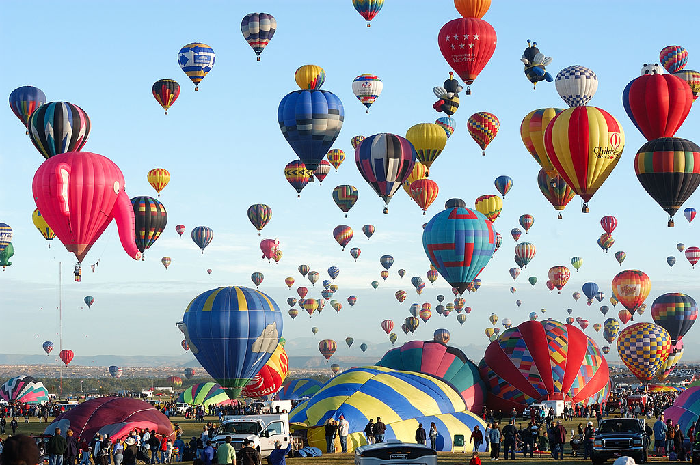

In [6]:
from PIL import Image
import numpy as np

original_filename = "balloons.jpg"

orig = Image.open(original_filename)
origWidth, origHeight = orig.size

width = 700
scalingFactor = width / origWidth
height = int(scalingFactor * origHeight)

img = orig.resize((width, height))
img

Now we collect all the different colors in the original image.

In [2]:
colors = set(img.getdata())
print(f"There are {len(colors)} colors in the original.")

There are 134210 colors in the original.


And now we cluster those colors. For now, let's say that we want to end up with 7 colors. We use `scikit-learn` to do the actual clustering.

In [3]:
from sklearn.cluster import KMeans
points = np.array(list(colors))
k = 7
kmeans = KMeans(n_clusters=k).fit(points)

Now use the 7 colors to repaint the image:

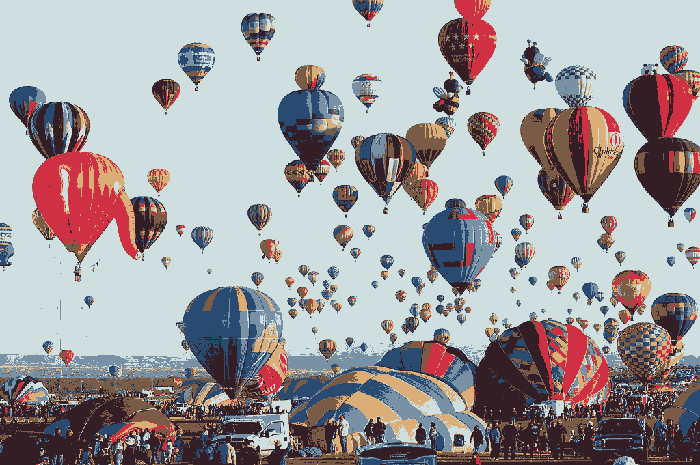

In [4]:
to_predict = np.array(img.getdata())
predicted = kmeans.predict(to_predict)
o = [tuple(map(int, kmeans.cluster_centers_[c])) for c in predicted]
out = Image.new('RGB', (width, height))
out.putdata(o)
out

Nice! We have nicely approximated the original image using only 7 colors! Let's see what happens when we devise a simple file format to write out our result:

In [5]:
output_filename = "compressed.img"
with open(output_filename, "w") as f:
    f.write(f"{width}\n")
    f.write(f"{height}\n")
    f.write(f"{k}\n") # print the number of clusters
    for i in range(k):
        r, g, b = tuple(kmeans.cluster_centers_[i])
        f.write(f"{r},{g},{b}\n")
    for c in predicted:
        f.write(f"{c}\n")

import os.path
original_size = os.path.getsize(original_filename)
compressed_size = os.path.getsize(output_filename)

print(f"Original: {original_size} bytes, compressed: {compressed_size} bytes (compression: {compressed_size / original_size * 100}%)")

Original: 229755 bytes, compressed: 651398 bytes (compression: 283.51853060869183%)


Hm. Seems like JPEG still beats us ;)